# Import Dependencies and data Cleaning

In [1]:
# import dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read in the data using pandas
data = pd.read_csv('Data/LA_Crime_Data.csv')

# Conver data into a DataFrame
data_df = pd.DataFrame(data)
data_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
# Clean the data, get rid of NaN values, drop duplicate DR_NO, Get rid of age 0, Get rid blank gender ('-')
data_df.info()
data_df.isnull().sum()
# data_df['Premis Cd'].unique()



# Drop columns that are not needed (Crm Cd 2, Crm Cd 3, Crm Cd 4, Cross Street)
# Get rid of Mcode rows with NaN values.  
# Look into Weapon Desc, Weapon Use. Figure out what the info means (Tracked as a number) Decide if we want to keep it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           925720 non-null  int64  
 1   Date Rptd       925720 non-null  object 
 2   DATE OCC        925720 non-null  object 
 3   TIME OCC        925720 non-null  int64  
 4   AREA            925720 non-null  int64  
 5   AREA NAME       925720 non-null  object 
 6   Rpt Dist No     925720 non-null  int64  
 7   Part 1-2        925720 non-null  int64  
 8   Crm Cd          925720 non-null  int64  
 9   Crm Cd Desc     925720 non-null  object 
 10  Mocodes         796258 non-null  object 
 11  Vict Age        925720 non-null  int64  
 12  Vict Sex        802562 non-null  object 
 13  Vict Descent    802552 non-null  object 
 14  Premis Cd       925709 non-null  float64
 15  Premis Desc     925161 non-null  object 
 16  Weapon Used Cd  319701 non-null  float64
 17  Weapon Des

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           129462
Vict Age               0
Vict Sex          123158
Vict Descent      123168
Premis Cd             11
Premis Desc          559
Weapon Used Cd    606019
Weapon Desc       606019
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          858483
Crm Cd 3          923460
Crm Cd 4          925656
LOCATION               0
Cross Street      780494
LAT                    0
LON                    0
dtype: int64

In [4]:
# Convert DATE OCC to datetime
clean_df = data_df[['DATE OCC']].copy()
clean_df['DATE OCC'] = pd.to_datetime(data_df['DATE OCC'])

# Crime report over the years. Bonus October Analysis

In [5]:
# Correctly access the dt accessor on the Series, not the DataFrame
data_2020 = clean_df[clean_df['DATE OCC'].dt.year == 2020]
data_2021 = clean_df[clean_df['DATE OCC'].dt.year == 2021]
data_2022 = clean_df[clean_df['DATE OCC'].dt.year == 2022]
data_2023 = clean_df[clean_df['DATE OCC'].dt.year == 2023]
data_2020

,DATE OCC
0,2020-03-01
1,2020-02-08
2,2020-11-04
3,2020-03-10
4,2020-08-17
...,...
199670,2020-03-05
199671,2020-10-01
199672,2020-12-01
199673,2020-10-20


In [13]:
# count of the crime of each month
# Take the crime count average of each month from the year 2020
crime_count_2020 = data_2020['DATE OCC'].dt.month.value_counts().sort_index()
crime_count_2021 = data_2021['DATE OCC'].dt.month.value_counts().sort_index()
crime_count_2022 = data_2022['DATE OCC'].dt.month.value_counts().sort_index()
crime_count_2023 = data_2023['DATE OCC'].dt.month.value_counts().sort_index()

# display the data
crime_count_2023

DATE OCC
1     19877
2     18451
3     19145
4     18864
5     18841
6     18655
7     19872
8     19990
9     19217
10    19967
11    18939
12    19337
Name: count, dtype: int64

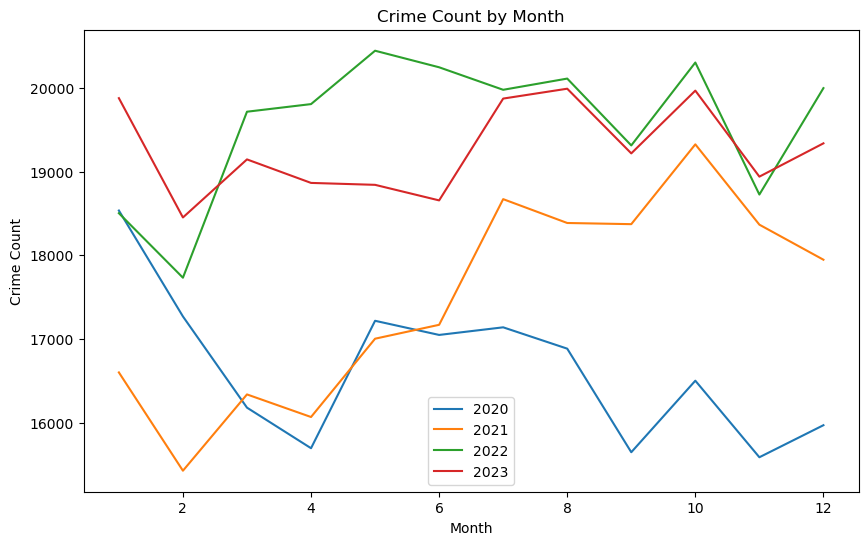

In [8]:
# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(crime_count_2020.index, crime_count_2020.values, label='2020')
plt.plot(crime_count_2021.index, crime_count_2021.values, label='2021')
plt.plot(crime_count_2022.index, crime_count_2022.values, label='2022')
plt.plot(crime_count_2023.index, crime_count_2023.values, label='2023')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Crime Count by Month')
plt.legend()
plt.show()

In [ ]:
#

October Analysis

In [9]:
# Isolate the october month 
october_2020 = data_2020[data_2020['DATE OCC'].dt.month == 10]
october_2021 = data_2021[data_2021['DATE OCC'].dt.month == 10]
october_2022 = data_2022[data_2022['DATE OCC'].dt.month == 10]
october_2023 = data_2023[data_2023['DATE OCC'].dt.month == 10]

# sort each df by date
october_2020 = october_2020.sort_values(by='DATE OCC')
october_2021 = october_2021.sort_values(by='DATE OCC')
october_2022 = october_2022.sort_values(by='DATE OCC')
october_2023 = october_2023.sort_values(by='DATE OCC')

# Reset the index
october_2020 = october_2020.reset_index(drop=True)
october_2021 = october_2021.reset_index(drop=True)
october_2022 = october_2022.reset_index(drop=True)
october_2023 = october_2023.reset_index(drop=True)

In [10]:
# value count for each year
oct_2020_value_count = october_2020['DATE OCC'].value_counts().sort_index()
oct_2021_value_count = october_2021['DATE OCC'].value_counts().sort_index()
oct_2022_value_count = october_2022['DATE OCC'].value_counts().sort_index()
oct_2023_value_count = october_2023['DATE OCC'].value_counts().sort_index()

# Reset the index
oct_2020_df = oct_2020_value_count.reset_index()
oct_2021_df = oct_2021_value_count.reset_index()
oct_2022_df = oct_2022_value_count.reset_index()
oct_2023_df = oct_2023_value_count.reset_index()

# Renaming columns to be more descriptive
oct_2020_df.columns = ['Date', 'Crime Count']
oct_2021_df.columns = ['Date', 'Crime Count']
oct_2022_df.columns = ['Date', 'Crime Count']
oct_2023_df.columns = ['Date', 'Crime Count']

# Print a DataFrame
oct_2023_df

,Date,Crime Count
0,2023-10-01,723
1,2023-10-02,670
2,2023-10-03,620
3,2023-10-04,619
4,2023-10-05,623
5,2023-10-06,676
6,2023-10-07,661
7,2023-10-08,649
8,2023-10-09,618
9,2023-10-10,628


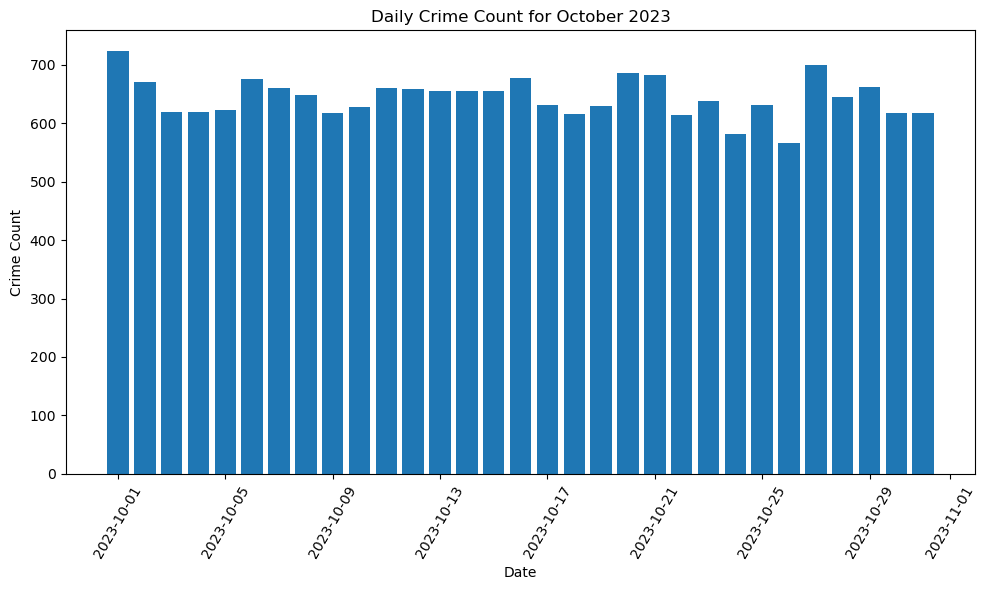

In [11]:
# Now you can plot using this DataFrame
plt.figure(figsize=(10, 6))
plt.bar(oct_2023_df['Date'], oct_2023_df['Crime Count'])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Daily Crime Count for October 2023')
plt.tight_layout()
plt.show()

# Top Crimes committed in LA (Bar chart) (Ritika)

In [15]:
# Create a dataframe (top_crime_df) that contains the top 10 crimes
# columns = Crime, Count 
top_crime_df = data_df['Crm Cd Desc'].value_counts().reset_index()
top_crime_df.columns = ['Crime', 'Count']
top_crime_df.head(10)

,Crime,Count
0,VEHICLE - STOLEN,99451
1,BATTERY - SIMPLE ASSAULT,73376
2,BURGLARY FROM VEHICLE,57098
3,THEFT OF IDENTITY,57079
4,BURGLARY,56736
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",56148
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",52493
7,THEFT PLAIN - PETTY ($950 & UNDER),47148
8,INTIMATE PARTNER - SIMPLE ASSAULT,45902
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),35698


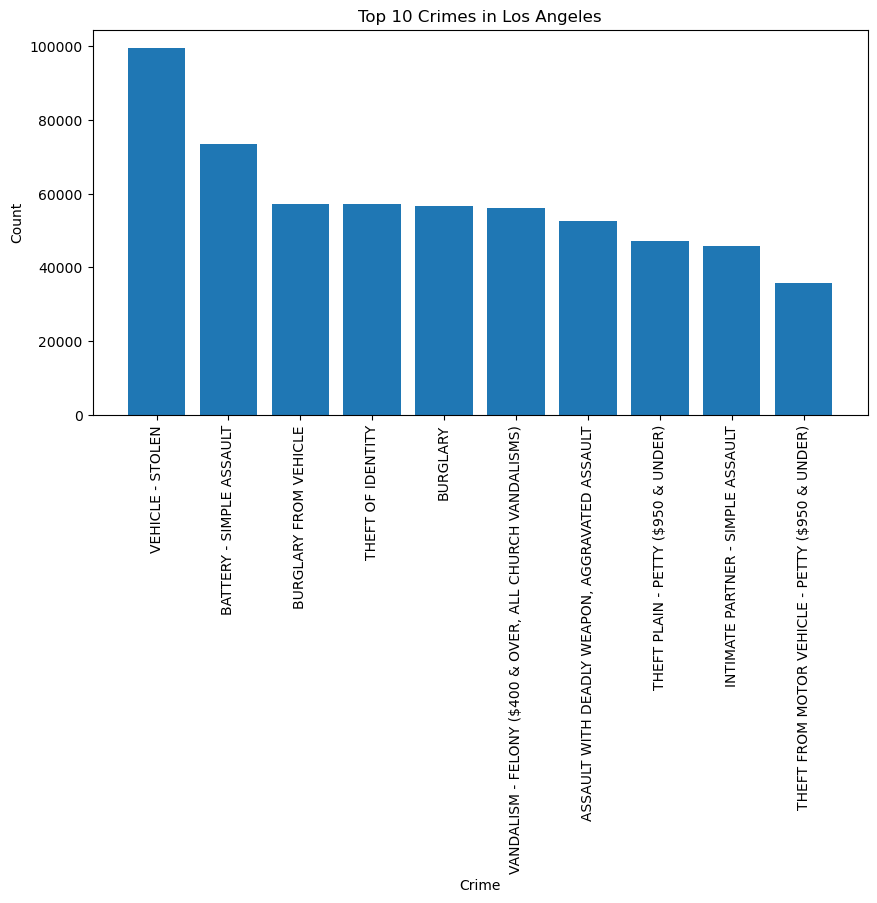

In [16]:
# Plot the top 10 crimes using plt.bar
plt.figure(figsize=(10,5))
plt.bar(top_crime_df['Crime'].head(10), top_crime_df['Count'].head(10))
plt.xlabel('Crime')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 10 Crimes in Los Angeles')
plt.show()

top 10 crimes in LA. Bar chart is nice but a pie chart would be better. Pie chart will show the proportions. I
think it should show the top 10 crimes like below but the other crimes
are lumped together in an ‘other’ category. (Ritika)

ValueError: could not convert string to float: 'VEHICLE - STOLEN'

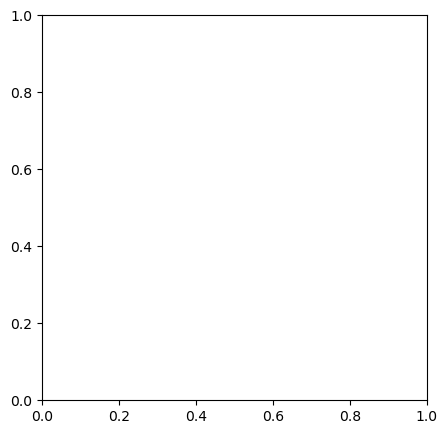

In [17]:
# Plot the top 10 crimes using plt.bar
plt.figure(figsize=(10,5))
plt.pie(top_crime_df['Crime'].head(10), top_crime_df['Count'].head(10))
plt.xlabel('Crime')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 10 Crimes in Los Angeles')
plt.show()